# **Import Beberapa Library Pembantu dan Loading Data**
Disini akan didefinisikan beberapa library pembantu dan juga memuat dataset serta pemisahan data train dan test dengan perbandingan 70:30

In [29]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
data = pd.read_csv('EEG_mental.csv')

X = data.drop('Label', axis=1)
y = data['Label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [5]:
data.head()

,lag1_mean_0,lag1_mean_1,lag1_mean_2,lag1_mean_3,lag1_mean_d_h2h1_0,lag1_mean_d_h2h1_1,lag1_mean_d_h2h1_2,lag1_mean_d_h2h1_3,lag1_mean_q1_0,lag1_mean_q1_1,...,freq_669_3,freq_679_3,freq_689_3,freq_699_3,freq_709_3,freq_720_3,freq_730_3,freq_740_3,freq_750_3,Label
0,25.781648,33.836367,-92.769629,19.187957,-1.542262,0.197462,-119.561133,2.032654,21.596272,33.965587,...,0.000230,0.000351,0.000547,0.000381,0.000350,0.000453,0.000442,0.000325,0.000209,2.0
1,29.357891,26.792566,417.203910,19.472121,-38.797263,-16.897194,-29.368531,-9.055370,44.647424,40.893307,...,0.001671,0.000740,0.001122,0.000521,0.000624,0.000439,0.001249,0.000727,0.000801,2.0
2,28.451926,31.076434,72.231301,14.245938,-13.225057,-0.614138,-28.331698,-8.858742,31.450289,30.692883,...,0.000748,0.000569,0.000327,0.000197,0.000833,0.000909,0.000699,0.001165,0.000616,2.0
3,21.282184,19.985184,16.220094,39.787312,1.847866,0.670216,-1.820355,20.220724,21.404679,20.777411,...,0.000990,0.005644,0.006891,0.010546,0.009583,0.011158,0.008853,0.004551,0.002287,1.0
4,20.431516,28.982168,27.540246,19.960398,2.491458,-6.020503,-1.071166,2.655259,16.295039,32.658163,...,0.001659,0.014379,0.014492,0.002949,0.004575,0.008305,0.007202,0.006957,0.009836,2.0


# **Inisialisasi Support Vector Machine sebagai Classifier**
Disini akan diinisialisasi sebuah support vector machine untuk melakukan klasifikasi dengan menggunakan kernel Gaussian/Radial Basis Function dan menggunakan metode one-against-all.

In [18]:
svm_classifier = SVC(kernel='rbf', C=10, gamma=0.01, decision_function_shape='ovr')

# **Pelatihan Model SVM**
Disini model SVM akan dilatih untuk melakukan klasifikasi 'Mental State' ke salah satu dari 3 label yang ada menggunakan data pelatihan yang telah disiapkan.

In [19]:
svm_classifier.fit(X_train, y_train)

SVC(C=10, gamma=0.01)

# **Pengujian dan Evaluasi Model SVM**
Model SVM yang telah dilatih kemudian akan dievaluasi akurasi dan performanya dengan menggunakan data pengujian yang telah disiapkan. Data yang digunakan merupakan data baru yang belum pernah dikenali oleh model.

Akurasi: 0.63


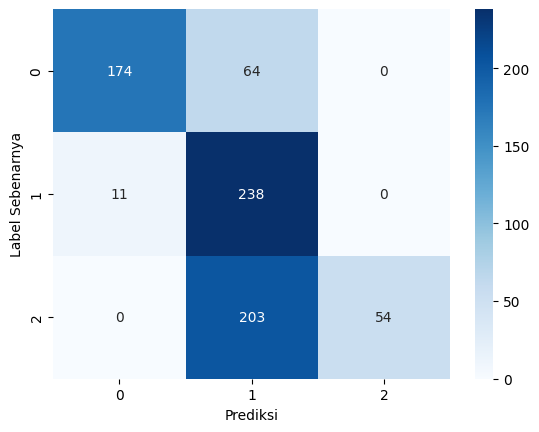

In [33]:
y_pred = svm_classifier.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f'Akurasi: {accuracy:.2f}')

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Prediksi')
plt.ylabel('Label Sebenarnya')
plt.show()

# **User Input**
Disini pengguna dapat memasukkan data sendiri untuk melakukan klasifikasi, data berupa csv yang berjumlah 1 baris dengan data fitur EEG

In [31]:
def predict_with_classifier(classifier, input_file):
    input_data = pd.read_csv(input_file)

    predictions = classifier.predict(input_data)

    predictions_text = 'Rileks' if predictions==0 else 'Konsentrasi' if predictions==1 else 'Netral'

    print('Hasil Prediksi Keadaan Mental:')
    print(predictions_text)

input_path = 'user_input.csv'
predict_with_classifier(svm_classifier, input_path)

Hasil Prediksi Keadaan Mental:
Konsentrasi
